John Rapp Farnes | 405461225

I John Rapp Farnes with UID 405461225 have read and understood the policy on academic dishonesty available on the course website.

In [1]:
alpha = 5 % 8 + 1
alpha

6

My $\alpha=6$

\newpage

# Perceptron

## (a)
We have $w^{t+1}=w^{t}-\eta \nabla J(w^t)=w^{t}+\eta y_ix_i$, where $y_i=1$ if positive and $y_i=-1$ if negative. As such:

### Input $x$ is falsely classified as positive:
$$
y_i = -1 \implies
w^{t+1}=w^{t}-\eta x_i
$$

### Input $x$ is falsely classified as negative:
$$
y_i = 1 \implies
w^{t+1}=w^{k}+\eta x_i
$$

## (b)

Sequency of w:s
  w0 = [0 1 1]
  w1 = [0 1 1]
  w2 = [  1.  -5. -11.]
  w3 = [0. 3. 5.]
  w4 = [-1.  0.  4.]


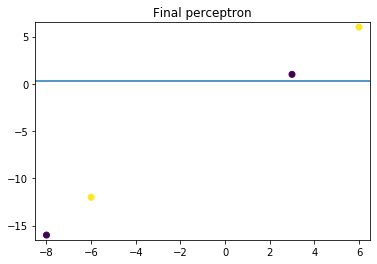

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.array([
    [alpha, alpha],
    [-alpha, -2*alpha],
    [-8, -16],
    [3, 1],
])

y = [1,1,-1,-1]

def perceptron(X, y):
    N = X.shape[0]
    X = np.c_[np.ones(N), X]
    w = np.array([0, 1, 1])
    
    ws = [w]
    
    for i in range(N):
        if y[i] * np.dot(w, X[i]) <= 0:
            w = w + y[i] * X[i]
        ws.append(w)
    return ws

def plot_perceptron(X, y, w):
    plt.scatter(X[:, 0], X[:, 1], c = y)

    x1 = [min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5]
    x2 = [0, 0]
    for i in range(2):
        x2[i] = -np.dot(w, [1, x1[i], 0])/w[2]

    plt.plot(x1, x2)
    plt.xlim(*x1)
    plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)

ws = perceptron(x, y)

print(f"Sequency of w:s")
for i in range(len(ws)):
    print(f"  w{i} = {ws[i]}")

w = ws[-1]

plt.title(f"Final perceptron")
plot_perceptron(x, y, w)

\newpage

# K-NN classifier

## (a)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.metrics import accuracy_score

data = pd.read_csv('Q2data.csv', header=None)

In [4]:
testing_start = 10*(alpha - 1)
testing_end = 10*alpha - 1
testing_indices = [k for k in range(testing_start, testing_end + 1)]

testing_data = data.loc[testing_indices]

training_data = data.drop(testing_indices)

In [5]:
training_x = np.array(training_data[[0, 1]])
training_y = np.array(training_data[2])

testing_x = np.array(testing_data[[0, 1]])
testing_y = np.array(testing_data[2])

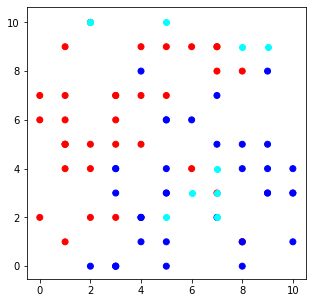

In [6]:
colors = ['red' if y == 1 else 'blue' for y in training_y]
plt.figure(figsize=[5,5])
plt.scatter(training_x.T[0], training_x.T[1], color = colors)

plt.scatter(testing_x.T[0], testing_x.T[1], color = 'cyan')
plt.show()

The data is not linearly separable!

\newpage

## (b)


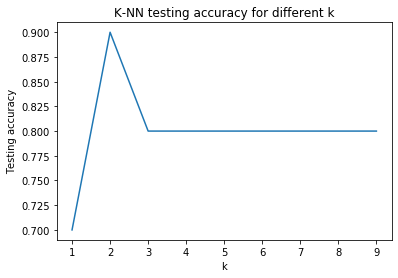

In [7]:
def l1_norm(x, y):
    return np.abs((x - y)).dot([1, 1])

def find_k_min_indices(X, k):
    min_k = []
    
    for i in range(len(X)):
        if len(min_k) < k:
            min_k.append(i)
            next;
        for j in range(len(min_k)):
            if X[i] < X[min_k[j]]:
                min_k.insert(j, i)
                min_k.pop()
                break;
    return min_k

def find_most_common(min_ys):
    frac_of_1 = sum(min_ys == 1) / len(min_ys)
    
    if frac_of_1 == 0.5: return None, False
    else:
        return (1 if frac_of_1 > 0.5 else 0), True

def knn_classifier(x, k, training_x, training_y, y_tie = 0):
    dists = [l1_norm(x, x_t) for x_t in training_x]
    
    min_indices = find_k_min_indices(dists, k)
    min_ys = training_y[min_indices]

    most_common, has_dominant_value = find_most_common(min_ys)
    
    return most_common if has_dominant_value else y_tie

def pred_y(X, k):
    return [knn_classifier(x, k, training_x, training_y) for x in X]


testing_acc = []
ks = range(1, 10)
for k in ks:
    testing_acc.append(accuracy_score(testing_y, pred_y(testing_x, k)))

plt.plot(ks, testing_acc)
plt.xlabel("k")
plt.ylabel("Testing accuracy")
plt.title("K-NN testing accuracy for different k")
plt.show()

\newpage

# Decision Tree

I will do the calculations in Python, as they are repetetive, and to reduce error.

## (a)

In [8]:
table = {
    'ECE102': [1,0,1,0,1,0,1,0],
    'ECE131': [1,1,1,1,0,0,0,0],
    'MATH61': [1,1,0,0,0,0,1,0],
    'MUSC15': [1,0,0,1,1,0,1,1],
    'ECE146': [1,1,1,1,0,0,1,0]
}
table = pd.DataFrame(data=table)


We have $H(X)=-\sum_{k=1}^{K}p_k \log p_k$. For a binary variable, this simplifies to $H(X)=-p_0\log p_0 -(1-p_0)\log (1-p_0)$


In [9]:
def entropy_Y(Y):
    P_Y0 = sum(Y == 0) / len(Y)
    if P_Y0 == 1 or P_Y0 == 0: return 0 
    return -P_Y0*np.log2(P_Y0) -(1-P_Y0)*np.log2((1-P_Y0))

H_Y = entropy_Y(table['ECE146'])
print(f'H(ECE146)={H_Y}')

H(ECE146)=0.954434002924965


## (b)

We have $H(Y\vert X)=\sum_j H(Y\vert X=x_j)P(X=x_j)$, where 

$$
\begin{aligned}
H(Y\vert X=x_j)&=-\sum_{k=1}^{K}P(Y=y_k\vert X=x_j)\log P(Y=y_k\vert X=x_j) \\
&=-\sum_{k=1}^{K}\frac{P(Y=y_k, X=x_j)}{P(X=x_j)}\log \frac{P(Y=y_k, X=x_j)}{P(X=x_j)}
\end{aligned}
$$

In [10]:
# To do the calculations, I will use normalized cross-tables. E.g.
crosstab = pd.crosstab(table['ECE146'], table['ECE102'], margins=True, normalize=True)
crosstab

ECE102,0,1,All
ECE146,,,
0,0.25,0.125,0.375
1,0.25,0.375,0.625
All,0.50,0.500,1.000


In [11]:
# We then have, e.g. for ECE102

P_Y1_X0 = crosstab[1][0]/crosstab["All"][0]
print(f'P_Y1_X0={P_Y1_X0}')

P_Y0_X0 = crosstab[0][0]/crosstab["All"][0]
print(f'P_Y0_X0={P_Y0_X0}')

H_Y_X0 = -(0 if P_Y1_X0 == 0 else P_Y1_X0*np.log2(P_Y1_X0)) \
        -(0 if P_Y0_X0 == 0 else P_Y0_X0*np.log2(P_Y0_X0))

print(f'H_Y_X0={H_Y_X0}')

P_Y1_X0=0.3333333333333333
P_Y0_X0=0.6666666666666666
H_Y_X0=0.9182958340544896


In [12]:
P_Y1_X1 = crosstab[1][1]/crosstab["All"][1]
print(f'P_Y1_X1={P_Y1_X1}')

P_Y0_X1 = crosstab[0][1]/crosstab["All"][1]
print(f'P_Y0_X1={P_Y0_X1}')

H_Y_X1 = -(0 if P_Y1_X1 == 0 else P_Y1_X1*np.log2(P_Y1_X1)) \
        -(0 if P_Y0_X1 == 0 else P_Y0_X1*np.log2(P_Y0_X1))

print(f'H_Y_X1={H_Y_X1}')

P_Y1_X1=0.6
P_Y0_X1=0.4
H_Y_X1=0.9709505944546686


In [13]:
P_X0 = crosstab["All"][0]
print(f'P_X0={P_X0}')

P_X1 = crosstab["All"][1]
print(f'P_X1={P_X1}')

H_Y_X = P_X0 * H_Y_X0 + P_X1 * H_Y_X1
print(f'H_Y_X={H_Y_X}')

P_X0=0.375
P_X1=0.625
H_Y_X=0.9512050593046015


In [14]:
# I have implemented this in a function, that can then be used to calculate H(Y|X_k) for all k

def get(tab, c, r):
    return tab[c][r] if (c in tab and r in tab[c]) else 0

def entropy(tab):
    P_X0 = get(tab, 'All', 0)
    P_Y1_X0 = get(tab, 1, 0)/P_X0 if P_X0 != 0 else 0 
    P_Y0_X0 = get(tab, 0, 0)/P_X0 if P_X0 != 0 else 0 

    H_Y_X0 = -(0 if P_Y1_X0 == 0 else P_Y1_X0*np.log2(P_Y1_X0)) \
            -(0 if P_Y0_X0 == 0 else P_Y0_X0*np.log2(P_Y0_X0))

    P_X1 = get(tab, 'All', 1)
    P_Y1_X1 = get(tab, 1, 1)/P_X1 if P_X1 != 0 else 0 

    P_Y0_X1 = get(tab, 0, 1)/P_X1 if P_X1 != 0 else 0 

    H_Y_X1 = -(0 if P_Y1_X1 == 0 else P_Y1_X1*np.log2(P_Y1_X1)) \
            -(0 if P_Y0_X1 == 0 else P_Y0_X1*np.log2(P_Y0_X1))

    H_Y_X = P_X0 * H_Y_X0 + P_X1 * H_Y_X1
    
    return H_Y_X


attributes = {
    'ECE102',
    'ECE131',
    'MATH61',
    'MUSC15'
}

entropies = { k: entropy(pd.crosstab(table[k], table['ECE146'], margins=True, normalize=True)) for k in attributes }

entropies

{'MUSC15': 0.9512050593046015,
 'ECE131': 0.4056390622295664,
 'MATH61': 0.6068441215341679,
 'ECE102': 0.9056390622295665}

\newpage

## (c)

In [15]:
information_gains = { k: H_Y - entropy for k, entropy in entropies.items() }

information_gains

{'MUSC15': 0.0032289436203635224,
 'ECE131': 0.5487949406953987,
 'MATH61': 0.34758988139079716,
 'ECE102': 0.04879494069539858}

## (d)
As *ECE131* has the highest information gain, I will split on this attribute first.

\newpage

## (e)

In [16]:
# Divide into two sets, depending on vale of ECE131

branch1 = table.loc[table.ECE131 == 0]
print(branch1)

branch2 = table.loc[table.ECE131 == 1]
print(branch2)

   ECE102  ECE131  MATH61  MUSC15  ECE146
4       1       0       0       1       0
5       0       0       0       0       0
6       1       0       1       1       1
7       0       0       0       1       0
   ECE102  ECE131  MATH61  MUSC15  ECE146
0       1       1       1       1       1
1       0       1       1       0       1
2       1       1       0       0       1
3       0       1       0       1       1


In [17]:
# Calculate the entropy of the sub branches:

print(f'H(ECE146|branch1) = {entropy_Y(branch1.ECE146)}')
print(f'H(ECE146|branch2) = {entropy_Y(branch2.ECE146)}')

H(ECE146|branch1) = 0.8112781244591328
H(ECE146|branch2) = 0


In [18]:
# Branch 1 has entropy > 0, we will therefore continue splitting.
def get_information_gains(tab, attributes):
    entropies = { k: entropy(pd.crosstab(tab[k], tab['ECE146'], margins=True, normalize=True)) for k in attributes }

    H_Y = entropy_Y(tab['ECE146'])

    information_gains = { k: H_Y - entropy for k, entropy in entropies.items() }
    return information_gains


get_information_gains(branch1, {
    'ECE102',
    'MATH61',
    'MUSC15'
})

{'MUSC15': 0.12255624891826566,
 'MATH61': 0.8112781244591328,
 'ECE102': 0.31127812445913283}

In [19]:
# MATH61 has biggest gain, split on this branch

branch11 = branch1.loc[branch1.MATH61 == 0]
print(branch11)

branch12 = branch1.loc[branch1.MATH61 == 1]
print(branch12)

   ECE102  ECE131  MATH61  MUSC15  ECE146
4       1       0       0       1       0
5       0       0       0       0       0
7       0       0       0       1       0
   ECE102  ECE131  MATH61  MUSC15  ECE146
6       1       0       1       1       1


In [20]:
# Calculate the entropy of the sub branches:

print(f'H(ECE146|branch11) = {entropy_Y(branch11.ECE146)}')
print(f'H(ECE146|branch12) = {entropy_Y(branch12.ECE146)}')

H(ECE146|branch11) = 0
H(ECE146|branch12) = 0


In [21]:
# Entropy = 0 for both subbranches => no more splits on this branch

# We will therefore classify all the observations in this branch as the option with the highest sample probability

print(f'P(ECE146=1|branch11) = {sum(branch11.ECE146 == 1) / len(branch11.ECE146)}')
print(f'P(ECE146=1|branch12) = {sum(branch12.ECE146 == 1) / len(branch12.ECE146)}')

P(ECE146=1|branch11) = 0.0
P(ECE146=1|branch12) = 1.0


In [22]:
# As the entropy for branch 2 = 0, we will do the same here
print(f'P(ECE146=1|branch2) = {sum(branch2.ECE146 == 1) / len(branch2.ECE146)}')

P(ECE146=1|branch2) = 1.0


In [23]:
# The final decision tree can be visualized as such:
    
# ECE131 == 1 ?
#     Yes:
#         => ECE146 == 1
#     No: 
#         MATH61 == 1 ?
#             Yes:
#                 => ECE146 == 1
#             No: 
#                 => ECE146 == 0

In summary, a given student is good at ECE146 if they did well in ECE131, or if they didn't do well in ECE131 but did well in MATH61.

## (f)
Based on the above rule, student \#9 *is good* at ECE146, as the student did well in MATH61 (but not ECE131), and \#10 is *not* good at ECE146 as the student did well on neither ECE131 nor MATH61.

\newpage

# Linear Regression

## (a)
We have

$$
X = \begin{bmatrix}
1 & 0\\
1 & 6\\
1 & 7
\end{bmatrix}
$$

and

$$
y = \begin{bmatrix}
6\\
0\\
0
\end{bmatrix}
$$

## (b)

We have 

$$
\begin{aligned}
J(w)&=||Xw-y||^2 \\
&= (Xw-y)^T(Xw-y) \\
&= (w^TX^T-y^T)(Xw-y) \\
&= w^TX^TXw-\underbrace{y^TXw}_{=w^TX^Ty}-w^TX^Ty+y^Ty
\end{aligned}
$$

By expansion of the $L_2$-norm, and $x^T=x$ when x is scalar.

As such, by $\frac{d (x^Ty)}{dx} = y$ and $\frac{d (x^TAx)}{dx} = (A+A^T)x$ , we have a stationary point when

$$
\begin{aligned}
\frac{dJ(w)}{dw}&= 0 &&\Leftrightarrow \\
\frac{d}{dw} w^TX^TXw& - 2 \frac{d}{dw}w^TX^Ty + \underbrace{\frac{d}{dw}y^Ty}_{=0}=0 &&\Leftrightarrow \\
\underbrace{(X^TX + X^TX)}_{2X^TX}w& - 2 X^Ty=0 &&\Leftrightarrow \\
w&=(X^TX)^{-1}X^Ty\\
\end{aligned}
$$

This optimal $w$ can be calculated as such:

$$
X^TX = \begin{bmatrix}
1 & 1 & 1 \\
0 & 6 & 7
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 0\\
1 & 6\\
1 & 7
\end{bmatrix}
=
\begin{bmatrix}
3 & 13\\
13 & 85
\end{bmatrix}
$$

By Cramer's rule, we can calculate the inverse $(X^TX)^{-1}$ as such

$$
\begin{aligned}
(X^TX)^{-1} &= \frac{1}{\underbrace{\det{(X^TX)}}_{=3\cdot85-13^2}} \begin{bmatrix}
85 & -13\\
-13 & 3
\end{bmatrix} \\
&=\frac{1}{86} \begin{bmatrix}
85 & -13\\
-13 & 3
\end{bmatrix}
\end{aligned}
$$

Finally, we have

$$
\begin{aligned}
w &= \frac{1}{86}
\begin{bmatrix}
85 & -13\\
-13 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 1 & 1 \\
0 & 6 & 7
\end{bmatrix}
\cdot
\begin{bmatrix}
6\\
0\\
0
\end{bmatrix} \\
&= \frac{1}{86}
\begin{bmatrix}
85 & -13\\
-13 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
6\\
0\\
\end{bmatrix} \\
&= \frac{1}{86}
\begin{bmatrix}
510\\
-78\\
\end{bmatrix} \\
&\approx
\begin{bmatrix}
5.93\\
-0.907
\end{bmatrix}
\end{aligned}
$$

\newpage

## (c)

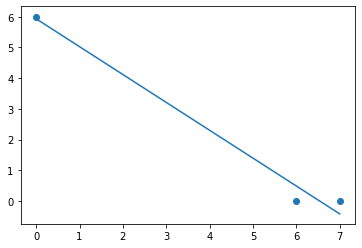

In [24]:
X = np.array([
    [1,0],
    [1,alpha],
    [1,alpha+1]
])
y = [6,0,0]
w = np.array([1/86*510,-1/86*78])

plt.scatter(X.T[1], y)

xl = [min(X.T[1]), max(X.T[1])]
# y = w^T X
yl = list(map(lambda x : w.dot([1, x]), xl))
plt.plot(xl, yl)
plt.show()

\newpage

# Support Vector Machine

## (a)

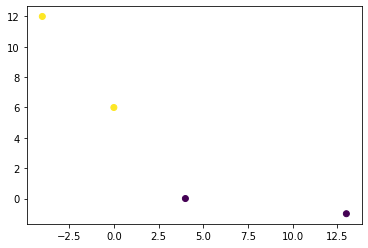

In [25]:
X = np.array([
    [-4, 12],
    [0, alpha],
    [10-alpha, 0],
    [13, -1],
])

y = np.array([1,1,-1,-1])

plt.scatter(X.T[0], X.T[1], c = y)
plt.show()

Yes it is linearly separable!

\newpage

## (b)

The primal problem is the following:

$$
\begin{aligned}
&\underset{w,b}{\max} &\frac{1}{2}||w||^2 \\
&\text{s.t.} & y^{(i)}(w^Tx^{(i)}+b)\ge1, &&i=1,\dots,m
\end{aligned}
$$

which we can write explicitly as:

$$
\begin{aligned}
&\underset{w,b}{\max} &&\frac{1}{2}(w_1^2+w_2^2) \\
&\text{s.t.}
 &&-4w_1+12w_2+b\ge1 \\
&&&6w_2+b\ge1\\
&&&-(4w_1+b)\ge1\\
&&&-(13w_1-w_2+b)\ge1
\end{aligned}
$$

## (c)

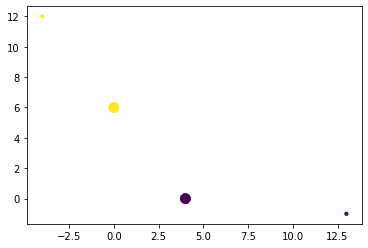

In [26]:
support_vecs = [1,2]

plt.scatter(X.T[0], X.T[1], c = y, s=[100 if i in support_vecs else 10 for i in range(len(X.T[0]))])
plt.show()

The support vectors are marked as the bigger dots above. These are the points closest to the "boundary" of the classes.

The lowest margin separating hyperplane is found as the line going perpendicular to the vector between the support vectors, right in the middle between them.

A normalized such $w$ may be found by taking $\frac{s_1-s_2}{||s_1-s_2||}$. $b$ is calculated by solving the equation (the distance being the same to both support vectors):

$$
\begin{aligned}
w^Tx_1+b&=-(w^Tx_2+b) \Leftrightarrow\\
b&=\frac{1}{2}(-w^Tx_2-w^Tx_1)
\end{aligned}
$$

w = [-0.5547002   0.83205029]
b = -1.386750490563073


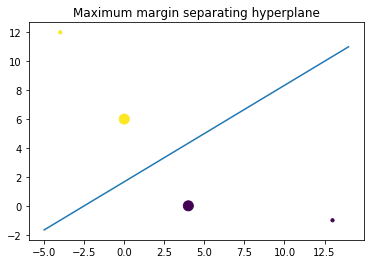

In [27]:
s1, s2 = X[support_vecs]

w = (s1 - s2) / np.linalg.norm(s1 - s2)
b = 1/2*(-w.dot(s1)-w.dot(s2))

print(f'w = {w}')
print(f'b = {b}')

plt.scatter(X.T[0], X.T[1], c = y, s=[100 if i in support_vecs else 10 for i in range(len(X.T[0]))])

x1 = np.array([-5, 14])
x2 = (-b - x1 * w[0]) / w[1]

plt.plot(x1, x2)
plt.title("Maximum margin separating hyperplane")
plt.show()

\newpage

## (d)

Let $i\in S = \{1,2\}$ be the indices of the support vectors. We then have $\alpha_i>0$ for $i \in S$ and $\alpha_i=0$ else. We have $x_1=(0,6)^T$, $x_2=(4,0)^T$, $y_1=1$ and $y_2=-1$.


With the given $x$ and $y$ values, and two chosen support vectors, the dual optimization problem
$$
\begin{aligned}
\underset{\alpha}{\max}\: &W(\alpha)=\sum_{i=1}^m \alpha_i -\frac{1}{2}\sum_{i,j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j (x^{(i)} \cdot x^{(j)}) \\
\text{s.t. } &\alpha_i \ge 0, i = 1,\dots,m \\
&\sum_{i=1}^m\alpha_i y^{(i)} = 0
\end{aligned}
$$

simplifies to
$$
\begin{aligned}
\underset{\alpha}{\max}\: &W(\alpha)=\alpha_1+\alpha_2 -\frac{1}{2}(\alpha_1^2\underbrace{||x_1||^2}_{=36}+\alpha_2^2\underbrace{||x_2||^2}_{=16}-2\alpha_1\alpha_2\underbrace{x_1^Tx_2}_{=0}) \\
\text{s.t. } &\alpha_i \ge 0, i = 1,\dots,m \\
&\alpha_1=\alpha_2
\end{aligned}
$$

Let $a=\alpha_1=\alpha_2$, we then have $W(a)=2a-\frac{a^2}{2}(||x_1||^2+||x_2||^2-2x_1^Tx_2)$.

We can then find the minimum by finding a stationary point of $W(\alpha)$, as it is of a single variable and unconstrained.

$$
\begin{aligned}
\frac{dW}{da}&=0 &&\Leftrightarrow \\
2-(||x_1||^2+||x_2||^2-2x_1^Tx_2)a&= 0 &&\Leftrightarrow \\
a& = \frac{2}{||x_1||^2+||x_2||^2-2x_1^Tx_2} &&\\
& = \frac{2}{52}=\frac{1}{26} \\
\end{aligned}
$$


Further, we have $w=\sum_n \alpha_n y^{(n)}x_n=a(0,6)^T-a(4,0)^T = \frac{1}{13}(-2,3)^T$ by the optimum critera.

Finally, we can calculate $b$ by

$$
\begin{aligned}
b &= \frac{1}{|S|}\sum_{n\in S}[y^{(n)}-(\sum_{k\in S}\alpha_n y^{(n)}x_n)^Tx_n] \\
&= \frac{1}{2}[1-\underbrace{w^Tx_1}_{=\frac{18}{13}}-1-\underbrace{w^Tx_2}_{=\frac{-8}{13}}] \\
&=-\frac{5}{13}
\end{aligned}
$$

w = [-0.15384615  0.23076923]
b = -0.38461538461538464


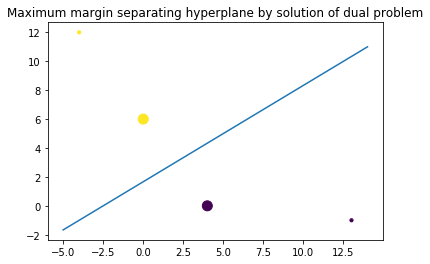

In [28]:
w = 1/13*np.array([-2,3])
b = -5/13

print(f'w = {w}')
print(f'b = {b}')

plt.scatter(X.T[0], X.T[1], c = y, s=[100 if i in support_vecs else 10 for i in range(len(X.T[0]))])

x1 = np.array([-5, 14])
x2 = (-b - x1 * w[0]) / w[1]

plt.plot(x1, x2)
plt.title("Maximum margin separating hyperplane by solution of dual problem")
plt.show()